## EDA — Análisis Exploratorio de Datos

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Rutas del dataset
train_dir = "../data/raw/train"
test_dir = "../data/raw/test"

# 1. Confirmar que las carpetas existen
print("Carpetas de entrenamiento:", os.listdir(train_dir))
print("Carpetas de prueba:", os.listdir(test_dir))


Carpetas de entrenamiento: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Carpetas de prueba: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [2]:
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(48, 48),  # tamaño estándar de FER2013
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)

class_names = train_ds.class_names
print("\nClases detectadas:", class_names)


Found 28709 files belonging to 7 classes.

Clases detectadas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


C:\Users\nigger\AppData\Local\Temp\ipykernel_13044\1981333394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


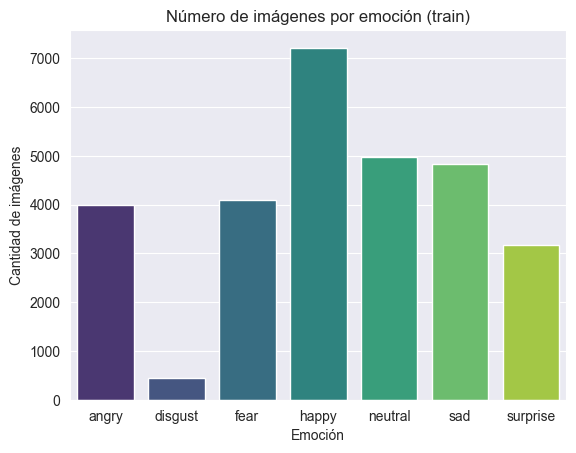

In [3]:
# Contar archivos por clase
counts = {label: len(os.listdir(os.path.join(train_dir, label))) for label in class_names}
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Número de imágenes por emoción (train)")
plt.xlabel("Emoción")
plt.ylabel("Cantidad de imágenes")
plt.show()


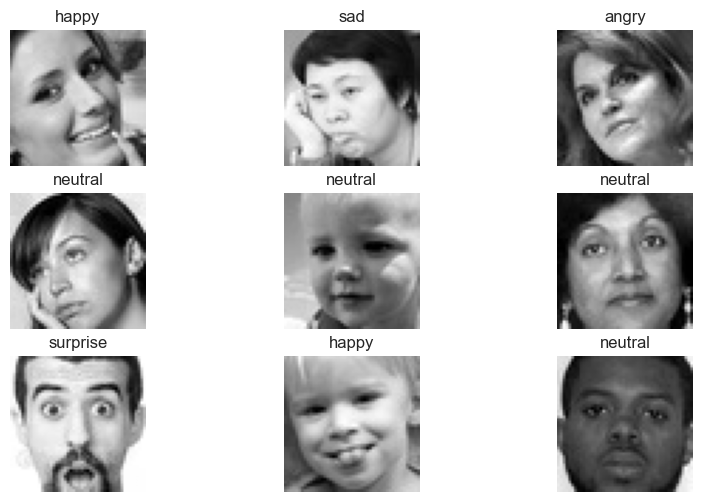

In [4]:
plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):  # toma un batch
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")